# Scikitlearn pipelines

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, OneHotEncoder, StandardScaler

In [10]:
df = pd.read_csv("data/general_data.csv", index_col="EmployeeID")
df.drop(['EmployeeCount','StandardHours'],axis=1, inplace = True) # Remove boring columns 
cat_cols = list(df.dtypes[df.dtypes == 'object'].index.values)
cat_cols.remove('Attrition') # remove target column 
num_cols = list(df.dtypes[df.dtypes != 'object'].index.values)

for col in cat_cols:
    df[col] = df[col].astype('category')

X = df[df.columns.difference(['Attrition'])]
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [3]:
numerical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2))])
categorical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder())])

column_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical, num_cols),
        ('cat', categorical, cat_cols)])

clf = Pipeline(steps=[('preprocessor', column_preprocessor),
                      ('classifier', KNeighborsClassifier())])

In [4]:
from sklearn import set_config
set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  ['Age', 'DistanceFromHome',
                                                   'Education', 'JobLevel',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'YearsAtCompany',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over18'])])),
                ('classifier', KNeighborsClassifier())])

In [11]:
X_train.shape, y_train.shape, X_test.shape

((3528, 20), (3528,), (882, 20))

In [5]:
param_dict = { 
    "classifier__n_neighbors": list(range(1,20,5)),
    "classifier__p": [1,2,3]
}

grid = GridSearchCV(clf, param_dict, cv=3, verbose=1, n_jobs=-1)
best_model = grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Kurzy\Pandas\env\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.95578231        nan        nan 0.84608844        nan
        nan 0.84212018        nan        nan 0.84212018        nan]
  warnings.warn(


In [6]:
best_knn = best_model.best_estimator_
# neigh.fit(X_train, y_train) 
y_pred = best_knn.predict(X_test)

print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(classification_report(y_test,y_pred))

plot_confusion_matrix(best_knn, X_test, y_test)

0.9897959183673469
0.9850981767180926
0.9766991127573434
              precision    recall  f1-score   support

          No       0.99      1.00      0.99       741
         Yes       0.98      0.96      0.97       141

    accuracy                           0.99       882
   macro avg       0.99      0.98      0.98       882
weighted avg       0.99      0.99      0.99       882



NameError: name 'plot_confusion_matrix' is not defined

In [7]:
param_dict = { 
    "preprocessor__num__poly__degree": [1,2,3],
    "preprocessor__num__imputer__strategy": ["mean", "median", "most_frequent"],
    "classifier__n_neighbors": list(range(1,20,5)),
    "classifier__p": [1,2,3]
}

grid = GridSearchCV(clf, param_dict, cv=3, verbose=1, n_jobs=-1)
best_model = grid.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


C:\Kurzy\Pandas\env\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.95833333 0.95578231 0.95323129
 0.95833333 0.95578231 0.95323129 0.95833333 0.95578231 0.95323129
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.85034014 0.84637188 0.85034014 0.8494898  0.84608844 0.85005669
 0.8494898  0.84608844 0.85034014        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.83843537 0.84212018 0.84438776
 0.83871882 0.84212018 0.84353741 0.83843537 0.84155329 0.84382086
        nan        nan        nan        nan        nan   

0.9863945578231292
0.9746748212593678
0.9746748212593678
              precision    recall  f1-score   support

          No       0.99      0.99      0.99       741
         Yes       0.96      0.96      0.96       141

    accuracy                           0.99       882
   macro avg       0.97      0.97      0.97       882
weighted avg       0.99      0.99      0.99       882



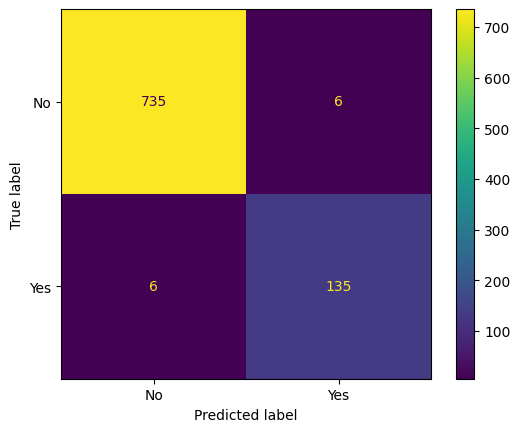

In [8]:
best_knn = best_model.best_estimator_
# neigh.fit(X_train, y_train) 
y_pred = best_knn.predict(X_test)

print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(classification_report(y_test,y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

numerical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2))])
categorical = categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder())])

column_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical, num_cols),
        ('cat', categorical, cat_cols)])

clf = Pipeline(steps=[('preprocessor', column_preprocessor),
                      ('RFE', RFE(LogisticRegression())),
                      ('classifier', KNeighborsClassifier())])

clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  ['Age', 'DistanceFromHome',
                                                   'Education', 'JobLevel',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTime...
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over18'])])),
                ('RFE', RFE(estimator=LogisticRegression())),
                ('classifier', KNeighborsClassifier())])

In [ ]:
param_dict = { 
    "preprocessor__num__poly__degree": [1,2,3],
    "preprocessor__num__imputer__strategy": ["mean", "median", "most_frequent"],
    "classifier__n_neighbors": list(range(1,20,5)),
    "classifier__p": [1,2,3]
}

grid = GridSearchCV(clf, param_dict, cv=3, verbose=1, n_jobs=-1)
best_model = grid.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


0.9931972789115646
0.9959839357429718
0.9787234042553192
              precision    recall  f1-score   support

          No       0.99      1.00      1.00       741
         Yes       1.00      0.96      0.98       141

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882



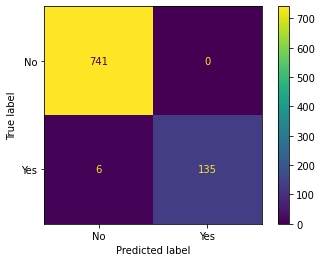

In [24]:
best_knn = best_model.best_estimator_
# neigh.fit(X_train, y_train) 
y_pred = best_knn.predict(X_test)

print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(classification_report(y_test,y_pred))

plot_confusion_matrix(best_knn, X_test, y_test)